# Import

In [1]:
from defdict import *
%matplotlib inline

In [2]:
def plot_dataset(x_data, y_data, y_pred=None):
    fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
    for col in range(3):
        plt.sca(axes[col])
        if y_data.shape[-1]==1:
            plot_series(col, x_data, y_data, y_pred=y_pred,
                    y_label=("$x(t)$" if col==0 else None))
        else:
            plot_multiple_forecasts(col, x_valid, y_valid, y_pred, 
                    y_label=("$x(t)$" if col==0 else None))
    plt.show()

def plot_next_time(idx, x_data, y_data, y_pred=None):
    plt.plot(x_data[idx], color='k', linewidth=3)
    for i in range(4):
        n=i*12+3
        plt.plot(np.arange(n+1,n+11),y_data[idx][n], linewidth=3, alpha=1)
        if y_pred is not None:
            plt.plot(np.arange(n+1,n+11),y_pred[idx][n], linewidth=0.1, marker='X')
    

# 15.3 시계열 예측하기 (604p)

#### dataset

(7000, 50, 1) (2000, 50, 1) (1000, 50, 1)
(7000, 1) (2000, 1) (1000, 1)


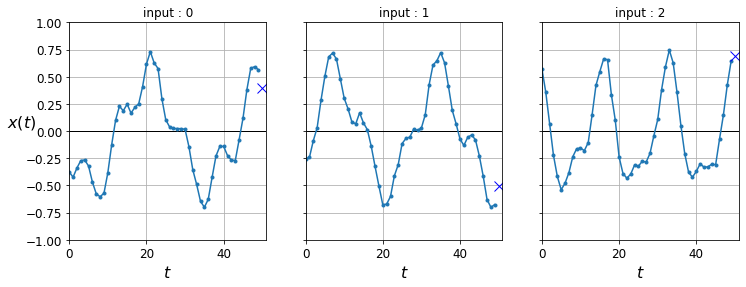

In [3]:
np.random.seed(42)
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
x_train, y_train = series[:7000, :n_steps], series[:7000, -1]
x_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
x_test, y_test = series[9000:, :n_steps], series[9000:, -1]

print(x_train.shape, x_valid.shape, x_test.shape)
print(y_train.shape, y_valid.shape, y_test.shape)

plot_dataset(x_valid, y_valid)

## 15.3.1 기준 성능 (605p)

#### step 1. build model

In [4]:
model = models.Sequential([
    layers.Flatten(input_shape=[50, 1]),
    layers.Dense(1)
])
model.compile(loss="mse", optimizer="adam")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


#### step 2. train model

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 0s 56us/sample - loss: 0.1004 - val_loss: 0.0559
Epoch 2/20
7000/7000 [==============================] - 0s 29us/sample - loss: 0.0386 - val_loss: 0.0269
Epoch 3/20
7000/7000 [==============================] - 0s 29us/sample - loss: 0.0205 - val_loss: 0.0162
Epoch 4/20
7000/7000 [==============================] - 0s 29us/sample - loss: 0.0133 - val_loss: 0.0118
Epoch 5/20
7000/7000 [==============================] - 0s 29us/sample - loss: 0.0104 - val_loss: 0.0098
Epoch 6/20
7000/7000 [==============================] - 0s 28us/sample - loss: 0.0089 - val_loss: 0.0087
Epoch 7/20
7000/7000 [==============================] - 0s 29us/sample - loss: 0.0080 - val_loss: 0.0078
Epoch 8/20
7000/7000 [==============================] - 0s 27us/sample - loss: 0.0073 - val_loss: 0.0071
Epoch 9/20
7000/7000 [==============================] - 0s 27us/sample - loss: 0.0066 - val_loss: 0.0065
Epoch 1

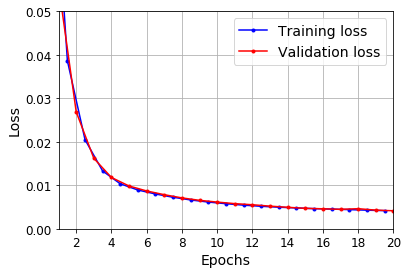

2000/2000 [==============================] - 0s 15us/sample - loss: 0.0041


0.004145486224442721

In [5]:
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_valid, y_valid))
plot_learning_curves(history.history["loss"], history.history["val_loss"])
model.evaluate(x_valid, y_valid)

#### step 3. use model

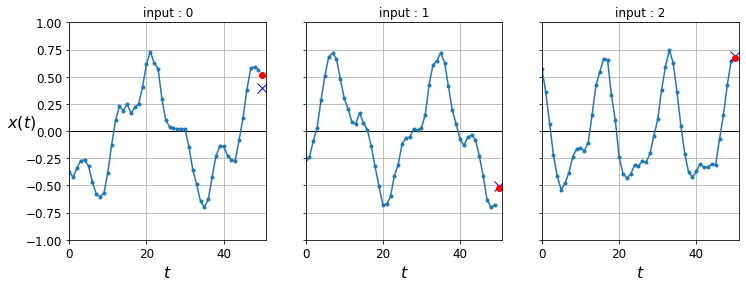

In [6]:
y_pred = model.predict(x_valid)
plot_dataset(x_valid, y_valid, y_pred)

## 15.3.2 간단한 RNN 구현하기 (606p)

#### step 1. build Model

In [7]:
model = models.Sequential([
    layers.SimpleRNN(1, input_shape=[None, 1])
])

model.compile(loss="mse", optimizer="adam")
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


#### step 2. train Model

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 2s 324us/sample - loss: 0.0600 - val_loss: 0.0505
Epoch 2/20
7000/7000 [==============================] - 2s 226us/sample - loss: 0.0401 - val_loss: 0.0336
Epoch 3/20
7000/7000 [==============================] - 2s 230us/sample - loss: 0.0265 - val_loss: 0.0221
Epoch 4/20
7000/7000 [==============================] - 2s 234us/sample - loss: 0.0180 - val_loss: 0.0156
Epoch 5/20
7000/7000 [==============================] - 2s 264us/sample - loss: 0.0139 - val_loss: 0.0128
Epoch 6/20
7000/7000 [==============================] - 2s 256us/sample - loss: 0.0123 - val_loss: 0.0118
Epoch 7/20
7000/7000 [==============================] - 2s 252us/sample - loss: 0.0119 - val_loss: 0.0115
Epoch 8/20
7000/7000 [==============================] - 2s 246us/sample - loss: 0.0117 - val_loss: 0.0113
Epoch 9/20
7000/7000 [==============================] - 2s 248us/sample - loss: 0.0117 - val_loss: 0.011

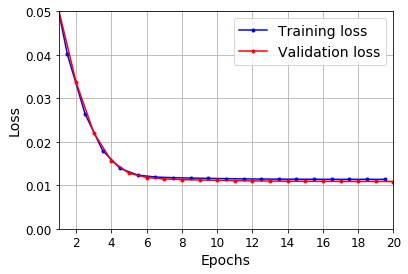

2000/2000 [==============================] - 0s 63us/sample - loss: 0.0109


0.010870387412607669

In [8]:
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_valid, y_valid))
plot_learning_curves(history.history["loss"], history.history["val_loss"])
model.evaluate(x_valid, y_valid)

#### step 3. use Model

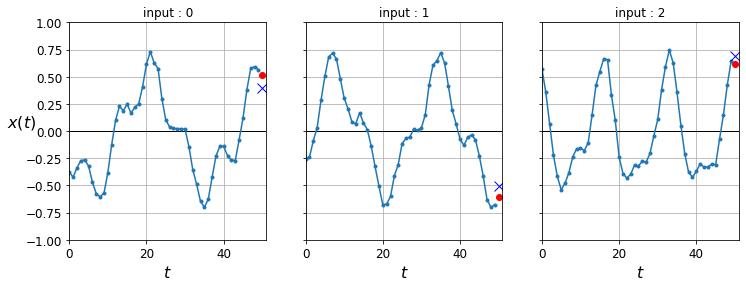

In [9]:
y_pred = model.predict(x_valid)
plot_dataset(x_valid, y_valid, y_pred)

## 15.3.3 심층 RNN (608p)

#### step 1. build model

In [10]:
model = models.Sequential([
    layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    layers.SimpleRNN(20, return_sequences=True),
    layers.SimpleRNN(1)
])
model.compile(loss="mse", optimizer="adam")
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, None, 20)          440       
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 20)          820       
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 1)                 22        
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________


#### step 2. use model

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 6s 878us/sample - loss: 0.0181 - val_loss: 0.0053
Epoch 2/20
7000/7000 [==============================] - 5s 654us/sample - loss: 0.0043 - val_loss: 0.0039
Epoch 3/20
7000/7000 [==============================] - 5s 656us/sample - loss: 0.0035 - val_loss: 0.0032
Epoch 4/20
7000/7000 [==============================] - 5s 663us/sample - loss: 0.0032 - val_loss: 0.0031
Epoch 5/20
7000/7000 [==============================] - 5s 650us/sample - loss: 0.0030 - val_loss: 0.0028
Epoch 6/20
7000/7000 [==============================] - 5s 664us/sample - loss: 0.0030 - val_loss: 0.0028
Epoch 7/20
7000/7000 [==============================] - 5s 652us/sample - loss: 0.0029 - val_loss: 0.0027
Epoch 8/20
7000/7000 [==============================] - 5s 658us/sample - loss: 0.0029 - val_loss: 0.0027
Epoch 9/20
7000/7000 [==============================] - 5s 656us/sample - loss: 0.0029 - val_loss: 0.002

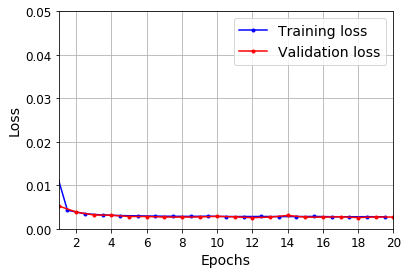

2000/2000 [==============================] - 0s 158us/sample - loss: 0.0027


0.0026991870235651733

In [11]:
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_valid, y_valid))
plot_learning_curves(history.history["loss"], history.history["val_loss"])
model.evaluate(x_valid, y_valid)

#### step 3. use model

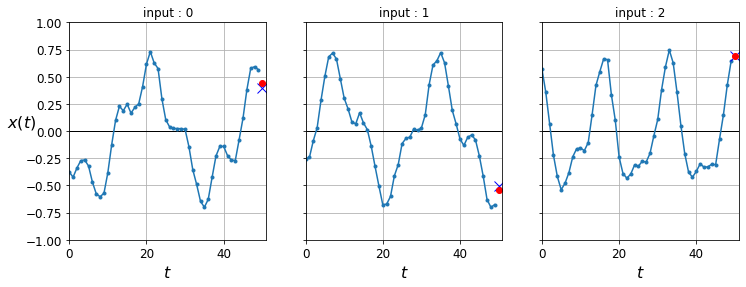

In [12]:
y_pred = model.predict(x_valid)
plot_dataset(x_valid, y_valid, y_pred)

## 15.3.4. 여러 타임 스텝 앞을 예측하기 (609p)

### 마지막 긴 길이의 타임스텝 예측하기 ( 610p )

#### dataset

(7000, 50, 1) (2000, 50, 1) (1000, 50, 1)
(7000, 10) (2000, 10) (1000, 10)


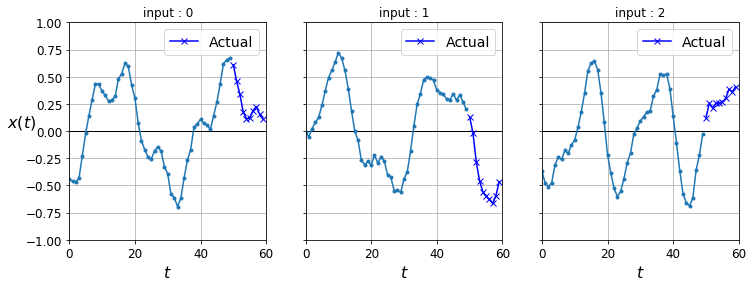

In [13]:
series = generate_time_series(10000, n_steps + 10)
x_train, y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
x_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
x_test, y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

print(x_train.shape, x_valid.shape, x_test.shape)
print(y_train.shape, y_valid.shape, y_test.shape)

plot_dataset(x_valid, y_valid)

#### step 1. build model

In [14]:
model = models.Sequential([
    layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    layers.SimpleRNN(20),
    layers.Dense(10)
])

model.compile(loss="mse", optimizer="adam")
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, None, 20)          440       
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 20)                820       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
Total params: 1,470
Trainable params: 1,470
Non-trainable params: 0
_________________________________________________________________


#### step 2. train model

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 4s 558us/sample - loss: 0.0248 - val_loss: 0.0210
Epoch 2/20
7000/7000 [==============================] - 4s 542us/sample - loss: 0.0191 - val_loss: 0.0183
Epoch 3/20
7000/7000 [==============================] - 4s 563us/sample - loss: 0.0161 - val_loss: 0.0155
Epoch 4/20
7000/7000 [==============================] - 4s 552us/sample - loss: 0.0140 - val_loss: 0.0130
Epoch 5/20
7000/7000 [==============================] - 4s 577us/sample - loss: 0.0129 - val_loss: 0.0122
Epoch 6/20
7000/7000 [==============================] - 4s 567us/sample - loss: 0.0122 - val_loss: 0.0123
Epoch 7/20
7000/7000 [==============================] - 4s 505us/sample - loss: 0.0114 - val_loss: 0.0109
Epoch 8/20
7000/7000 [==============================] - 3s 476us/sample - loss: 0.0110 - val_loss: 0.0108
Epoch 9/20
7000/7000 [==============================] - 3s 470us/sample - loss: 0.0106 - val_loss: 0.010

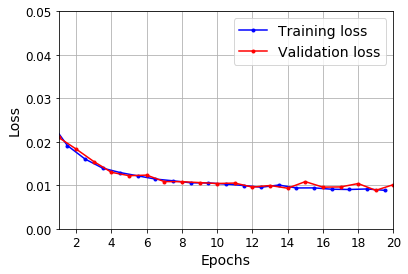

2000/2000 [==============================] - 0s 124us/sample - loss: 0.0101


0.010146961376070976

In [16]:
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_valid, y_valid))
plot_learning_curves(history.history["loss"], history.history["val_loss"])
model.evaluate(x_valid, y_valid)

#### step 3. use model

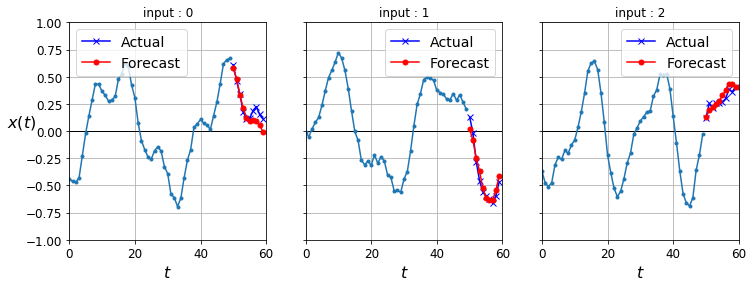

In [17]:
y_pred = model.predict(x_valid)
plot_dataset(x_valid, y_valid, y_pred)

### 여러 구간 긴 길이의 타임스텝 예측하기 ( 612p )

#### dataset

(7000, 50, 1) (2000, 50, 1) (1000, 50, 1)
(7000, 50, 10) (2000, 50, 10) (1000, 50, 10)


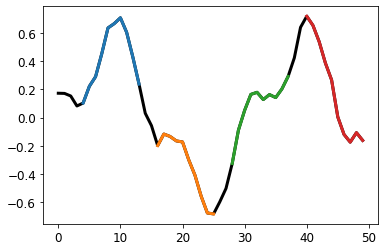

In [18]:
series = generate_time_series(10000, n_steps + 10)
x_train = series[:7000, :n_steps]
x_valid = series[7000:9000, :n_steps]
x_test = series[9000:, :n_steps]
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
y_train = Y[:7000]
y_valid = Y[7000:9000]
y_test = Y[9000:]

print(x_train.shape, x_valid.shape, x_test.shape)
print(y_train.shape, y_valid.shape, y_test.shape)

plot_next_time(0, x_valid, y_valid)

#### step 1. build model

In [21]:
model = models.Sequential([
    layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    layers.SimpleRNN(20, return_sequences=True),
    layers.TimeDistributed(layers.Dense(10))
])

model.summary()
def last_time_step_mse(y_true, y_pred):
    return tf.keras.metrics.mean_squared_error(y_true[:, -1], y_pred[:, -1])
model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(lr=0.01), metrics=[last_time_step_mse])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_10 (SimpleRNN)    (None, None, 20)          440       
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, None, 20)          820       
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 10)          210       
Total params: 1,470
Trainable params: 1,470
Non-trainable params: 0
_________________________________________________________________


#### step 2. train model 

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 4s 594us/sample - loss: 0.0376 - last_time_step_mse: 0.0244 - val_loss: 0.0355 - val_last_time_step_mse: 0.0208
Epoch 2/20
7000/7000 [==============================] - 4s 600us/sample - loss: 0.0331 - last_time_step_mse: 0.0205 - val_loss: 0.0321 - val_last_time_step_mse: 0.0211
Epoch 3/20
7000/7000 [==============================] - 4s 580us/sample - loss: 0.0298 - last_time_step_mse: 0.0180 - val_loss: 0.0283 - val_last_time_step_mse: 0.0164
Epoch 4/20
7000/7000 [==============================] - 4s 574us/sample - loss: 0.0276 - last_time_step_mse: 0.0160 - val_loss: 0.0291 - val_last_time_step_mse: 0.0182
Epoch 5/20
7000/7000 [==============================] - 4s 593us/sample - loss: 0.0264 - last_time_step_mse: 0.0151 - val_loss: 0.0258 - val_last_time_step_mse: 0.0148
Epoch 6/20
7000/7000 [==============================] - 4s 583us/sample - loss: 0.0239 - last_time_step_mse: 0.0

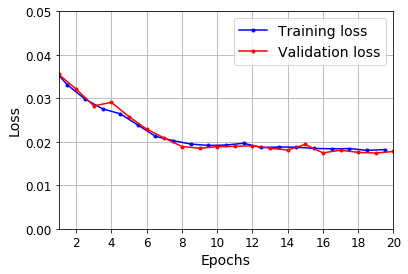

2000/2000 [==============================] - 0s 127us/sample - loss: 0.0178 - last_time_step_mse: 0.0062


[0.017779633082449436, 0.006191936]

In [23]:
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_valid, y_valid))
plot_learning_curves(history.history["loss"], history.history["val_loss"])
model.evaluate(x_valid, y_valid)

#### step 3. use model

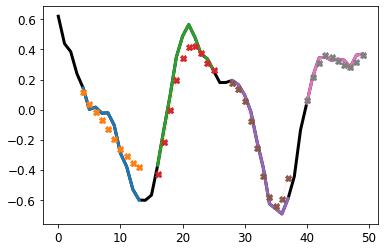

In [29]:
y_pred = model.predict(x_valid)
plot_next_time(4, x_valid, y_valid, y_pred)